In [235]:
import pandas as pd
import numpy as np
from datetime import datetime
import matplotlib.pyplot as plt
import seaborn as sns

## 1. Lectura del conjunto de datos

In [236]:
pd.options.display.max_columns = None

df_origen = pd.read_csv("heart_2020_cleaned.csv")
df_origen.head()

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
0,No,16.60,Yes,No,No,3.0,30.0,No,Female,55-59,White,Yes,Yes,Very good,5.0,Yes,No,Yes
1,No,20.34,No,No,Yes,0.0,0.0,No,Female,80 or older,White,No,Yes,Very good,7.0,No,No,No
2,No,26.58,Yes,No,No,20.0,30.0,No,Male,65-69,White,Yes,Yes,Fair,8.0,Yes,No,No
3,No,24.21,No,No,No,0.0,0.0,No,Female,75-79,White,No,No,Good,6.0,No,No,Yes
4,No,23.71,No,No,No,28.0,0.0,Yes,Female,40-44,White,No,Yes,Very good,8.0,No,No,No


## 2. Exploración y preprocesado

In [237]:
df = df_origen.copy()
df.head(1)


,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
0,No,16.6,Yes,No,No,3.0,30.0,No,Female,55-59,White,Yes,Yes,Very good,5.0,Yes,No,Yes


In [238]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 319795 entries, 0 to 319794
Data columns (total 18 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   HeartDisease      319795 non-null  object 
 1   BMI               319795 non-null  float64
 2   Smoking           319795 non-null  object 
 3   AlcoholDrinking   319795 non-null  object 
 4   Stroke            319795 non-null  object 
 5   PhysicalHealth    319795 non-null  float64
 6   MentalHealth      319795 non-null  float64
 7   DiffWalking       319795 non-null  object 
 8   Sex               319795 non-null  object 
 9   AgeCategory       319795 non-null  object 
 10  Race              319795 non-null  object 
 11  Diabetic          319795 non-null  object 
 12  PhysicalActivity  319795 non-null  object 
 13  GenHealth         319795 non-null  object 
 14  SleepTime         319795 non-null  float64
 15  Asthma            319795 non-null  object 
 16  KidneyDisease     31

In [239]:
df.describe()

,BMI,PhysicalHealth,MentalHealth,SleepTime
count,319795.000000,319795.00000,319795.000000,319795.000000
mean,28.325399,3.37171,3.898366,7.097075
std,6.356100,7.95085,7.955235,1.436007
min,12.020000,0.00000,0.000000,1.000000
25%,24.030000,0.00000,0.000000,6.000000
50%,27.340000,0.00000,0.000000,7.000000
75%,31.420000,2.00000,3.000000,8.000000
max,94.850000,30.00000,30.000000,24.000000


In [240]:
df["HeartDisease"].value_counts()

HeartDisease
No     292422
Yes     27373
Name: count, dtype: int64

### 2.1. Variables numéricas

<function matplotlib.pyplot.show(close=None, block=None)>

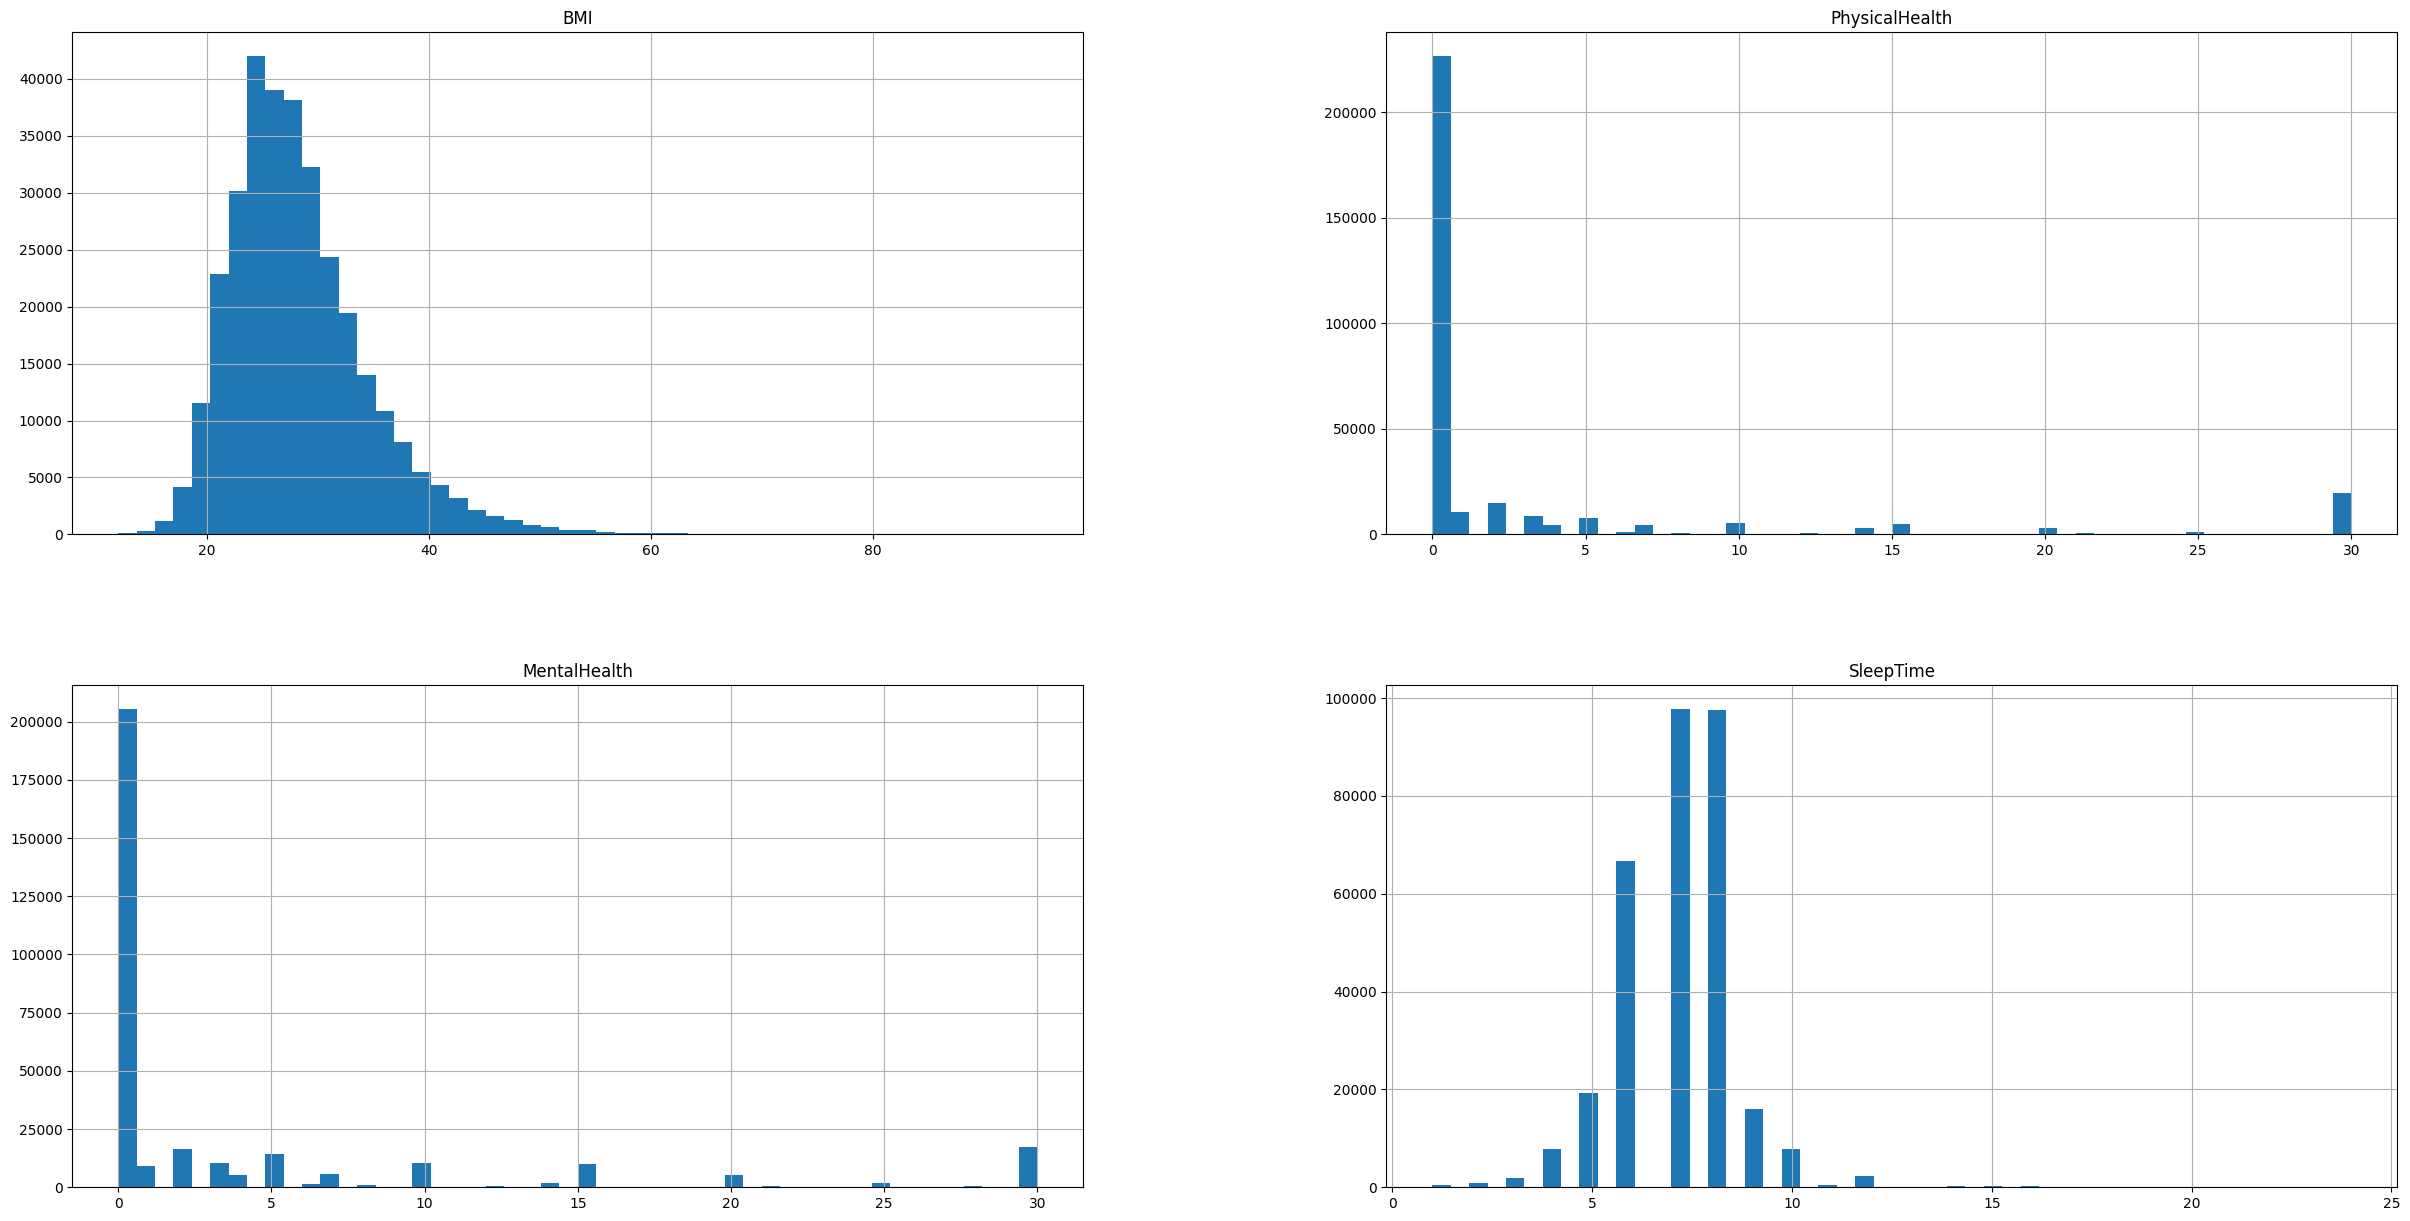

In [241]:
df.hist(bins=50, figsize=(30,15))
plt.show

### 2.2. Variables categóricas

In [242]:
df.select_dtypes(include="object").columns

Index(['HeartDisease', 'Smoking', 'AlcoholDrinking', 'Stroke', 'DiffWalking',
       'Sex', 'AgeCategory', 'Race', 'Diabetic', 'PhysicalActivity',
       'GenHealth', 'Asthma', 'KidneyDisease', 'SkinCancer'],
      dtype='object')

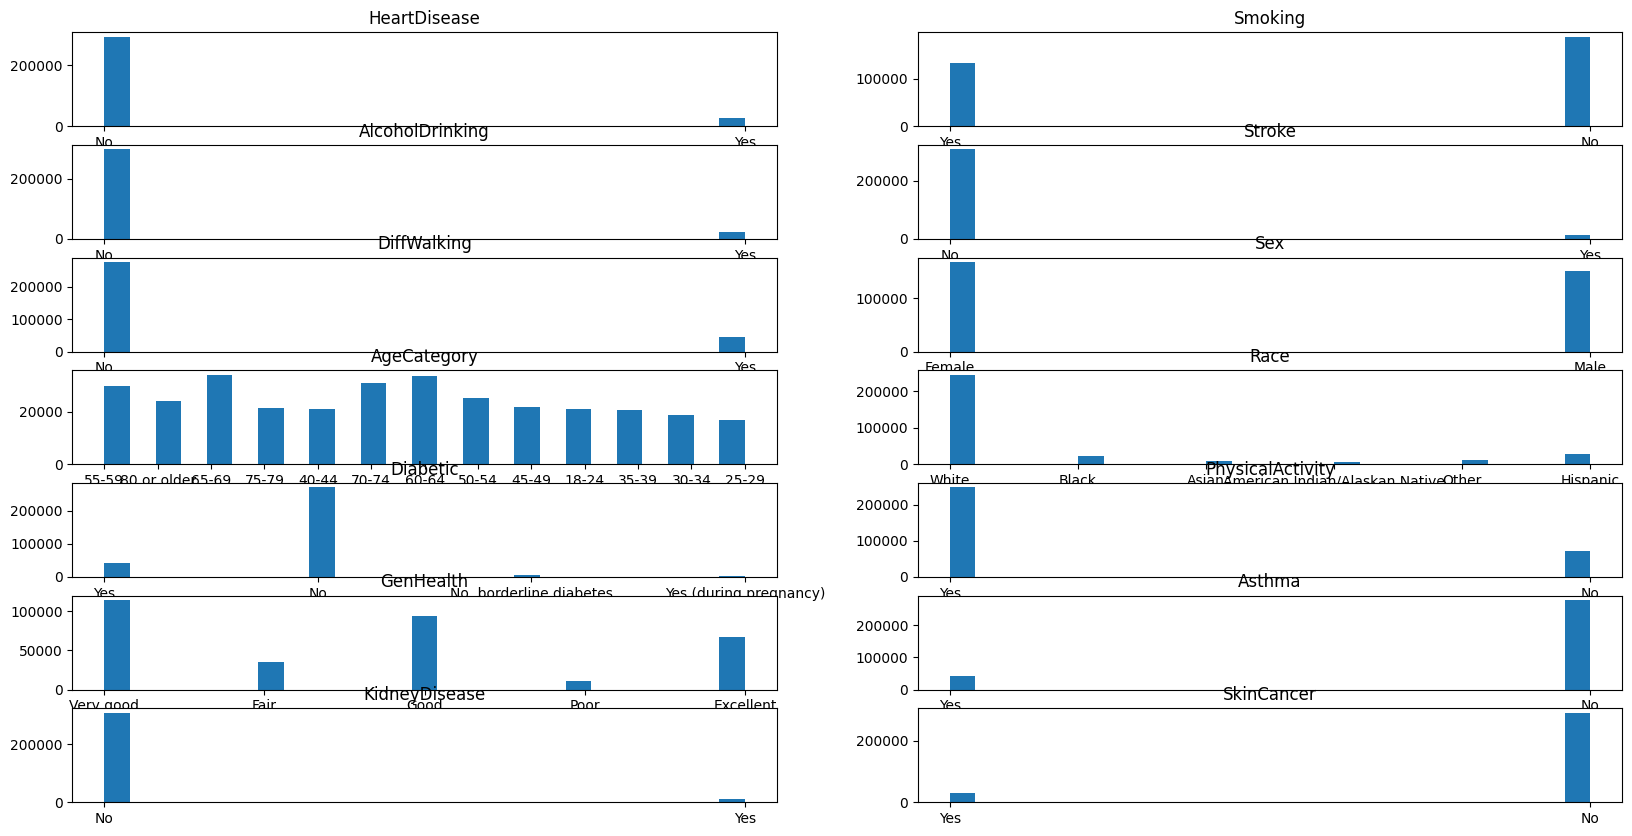

In [243]:
fig, axes = plt.subplots(nrows=7, ncols=2, figsize = (20,10))

axes = axes.flat
columnas = df.select_dtypes(include="object").columns

for i, colum in enumerate(columnas):
    ax = axes[i]
    ax.hist(df[colum], bins=25)
    axes[i].set_title(colum)

### 2.3. Correlaciones

In [244]:
from sklearn.preprocessing import LabelEncoder

def label_encoder(df, columnas):
    label_encoders = {}

    for col in df[columnas].columns:
        nuevo_nombre = col + "_encoded"
        le = LabelEncoder()
        df[col] = le.fit_transform(df[col])
        label_encoders[col] = le.classes_
    return df, label_encoders

In [245]:
df, label_encoders = label_encoder(df, df.select_dtypes(include="object").columns)

In [246]:
df.head()

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
0,0,16.60,1,0,0,3.0,30.0,0,0,7,5,2,1,4,5.0,1,0,1
1,0,20.34,0,0,1,0.0,0.0,0,0,12,5,0,1,4,7.0,0,0,0
2,0,26.58,1,0,0,20.0,30.0,0,1,9,5,2,1,1,8.0,1,0,0
3,0,24.21,0,0,0,0.0,0.0,0,0,11,5,0,0,2,6.0,0,0,1
4,0,23.71,0,0,0,28.0,0.0,1,0,4,5,0,1,4,8.0,0,0,0


In [247]:
df_corr = df.corr()
df_corr["HeartDisease"].sort_values(ascending=False)

HeartDisease        1.000000
AgeCategory         0.233432
DiffWalking         0.201258
Stroke              0.196835
PhysicalHealth      0.170721
Diabetic            0.168553
KidneyDisease       0.145197
Smoking             0.107764
SkinCancer          0.093317
Sex                 0.070040
BMI                 0.051803
Asthma              0.041444
Race                0.034854
MentalHealth        0.028591
SleepTime           0.008327
GenHealth          -0.011062
AlcoholDrinking    -0.032080
PhysicalActivity   -0.100030
Name: HeartDisease, dtype: float64

## 3. División del conjunto de datos

In [248]:
from sklearn.model_selection import train_test_split

In [249]:
def train_val_test_split(df, rstate=42, shuffle=True, stratify=None):
    strat = df[stratify] if stratify else None
    train_set, test_set = train_test_split(
        df, test_size=0.4, random_state=rstate, shuffle=shuffle, stratify=strat)
    strat = test_set[stratify] if stratify else None
    val_set, test_set = train_test_split(
        test_set, test_size=0.5, random_state=rstate, shuffle=shuffle, stratify=strat)
    return (train_set, val_set, test_set)

In [250]:
train_set, val_set, test_set = train_val_test_split(df=df)
print("Longitud del Training Set:", len(train_set))
print("Longitud del Validation Set:", len(val_set))
print("Longitud del Test Set:", len(test_set))

Longitud del Training Set: 191877
Longitud del Validation Set: 63959
Longitud del Test Set: 63959


## 4. Preparación del conjunto de datos

### 4.1. Gestión de nulos

In [251]:
df_null = pd.DataFrame(df.isnull().sum() / df.shape[0] * 100).sort_values(by=0, ascending=False)
df_null.reset_index(inplace=True)
df_null.rename(columns={"index": "nombre_columna", 0: "%_nulos"}, inplace=True)
df_null.head()


,nombre_columna,%_nulos
0,HeartDisease,0.0
1,BMI,0.0
2,Smoking,0.0
3,AlcoholDrinking,0.0
4,Stroke,0.0


In [252]:
# Transformador creado para elimar las filas con valores nulos
from sklearn.base import BaseEstimator, TransformerMixin

class DeleteNanRows(BaseEstimator, TransformerMixin):
    def __init__(self):
        pass
    def fit(self, X, y=None):
        return self
    def transform(self, X, y=None):
        return X.dropna()

### 4.2. Transformación de atributos categóricos a numéricos

In [253]:
X_train = train_set.drop("HeartDisease", axis=1)
y_train = train_set["HeartDisease"].copy()

In [254]:
# Ya se han transformado previamente para buscar las correlaciones

X_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 191877 entries, 302569 to 121958
Data columns (total 17 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   BMI               191877 non-null  float64
 1   Smoking           191877 non-null  int64  
 2   AlcoholDrinking   191877 non-null  int64  
 3   Stroke            191877 non-null  int64  
 4   PhysicalHealth    191877 non-null  float64
 5   MentalHealth      191877 non-null  float64
 6   DiffWalking       191877 non-null  int64  
 7   Sex               191877 non-null  int64  
 8   AgeCategory       191877 non-null  int64  
 9   Race              191877 non-null  int64  
 10  Diabetic          191877 non-null  int64  
 11  PhysicalActivity  191877 non-null  int64  
 12  GenHealth         191877 non-null  int64  
 13  SleepTime         191877 non-null  float64
 14  Asthma            191877 non-null  int64  
 15  KidneyDisease     191877 non-null  int64  
 16  SkinCancer        19

In [255]:
## Aquí podríamos utilizar el siguiente transformador
from sklearn.preprocessing import OneHotEncoder

class CustomOneHotEncoding(BaseEstimator, TransformerMixin):
    def __init__(self):
        self._oh = OneHotEncoder(sparse=False)
        self._columns = None
    def fit(self, X, y=None):
        X_cat = X.select_dtypes(include=['object'])
        self._columns = pd.get_dummies(X_cat).columns
        self._oh.fit(X_cat)
        return self
    def transform(self, X, y=None):
        X_copy = X.copy()
        X_cat = X_copy.select_dtypes(include=['object'])
        X_num = X_copy.select_dtypes(exclude=['object'])
        X_cat_oh = self._oh.transform(X_cat)
        X_cat_oh = pd.DataFrame(X_cat_oh, 
                                columns=self._columns, 
                                index=X_copy.index)
        X_copy.drop(list(X_cat), axis=1, inplace=True)
        return X_copy.join(X_cat_oh)

### 4.3. Escalado del conjunto de datos

In [256]:
from sklearn.preprocessing import RobustScaler

class CustomScaler(BaseEstimator, TransformerMixin):
    def __init__(self, attributes):
        self.attributes = attributes
    def fit(self, X, y=None):
        return self  # nothing else to do
    def transform(self, X, y=None):
        X_copy = X.copy()
        scale_attrs = X_copy[self.attributes]
        robust_scaler = RobustScaler()
        X_scaled = robust_scaler.fit_transform(scale_attrs)
        X_scaled = pd.DataFrame(X_scaled, columns=self.attributes, index=X_copy.index)
        for attr in self.attributes:
            X_copy[attr] = X_scaled[attr]
        return X_copy

In [257]:
custom_scaler = CustomScaler(["BMI"])
X_train_prep = custom_scaler.fit_transform(X_train)

### 4.4. Tratamiento del desbalanceo

In [258]:
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import RandomOverSampler

In [259]:
def down_sampler(X, y):
    down = RandomUnderSampler()
    return down.fit_resample(X,y)

In [260]:
X_train_down_prep, y_train_down_prep = down_sampler(X_train_prep, y_train)

### 4.5. Selección de características

In [261]:
from sklearn.ensemble import RandomForestClassifier

clf_rnd = RandomForestClassifier(n_estimators=50, random_state=42, n_jobs=-1)
clf_rnd.fit(X_train_down_prep, y_train_down_prep)

RandomForestClassifier(n_estimators=50, n_jobs=-1, random_state=42)

#### 4.5.1. Preprocesamiento del test

In [262]:
X_val = val_set.drop("HeartDisease", axis=1)
y_val = val_set["HeartDisease"].copy()

In [263]:
X_val_prep = custom_scaler.fit_transform(X_val)

In [264]:
X_val_down_prep, y_val_down_prep = down_sampler(X_val_prep, y_val)

In [265]:
y_val_down_pred_randomf = clf_rnd.predict(X_val_down_prep)

In [266]:
from sklearn.metrics import f1_score
print("F1 score:", f1_score(y_val_down_pred_randomf, y_val_down_prep, average='weighted'))

F1 score: 0.7377300809275202


In [267]:
clf_rnd.feature_importances_

array([0.23892647, 0.02274576, 0.01065708, 0.02727092, 0.064557  ,
       0.05633441, 0.04131821, 0.02863335, 0.19799504, 0.03323637,
       0.03648719, 0.02116268, 0.08956339, 0.0844145 , 0.01700129,
       0.01365022, 0.01604612])

In [268]:
feature_importances = {name: score for name, score in zip(list(df), clf_rnd.feature_importances_)}

In [269]:
feature_importances_sorted = pd.Series(feature_importances).sort_values(ascending=False)
feature_importances_sorted

HeartDisease        0.238926
Sex                 0.197995
PhysicalActivity    0.089563
GenHealth           0.084415
Stroke              0.064557
PhysicalHealth      0.056334
MentalHealth        0.041318
Race                0.036487
AgeCategory         0.033236
DiffWalking         0.028633
AlcoholDrinking     0.027271
BMI                 0.022746
Diabetic            0.021163
SleepTime           0.017001
KidneyDisease       0.016046
Asthma              0.013650
Smoking             0.010657
dtype: float64

In [270]:
columns = list(feature_importances_sorted.head(10).index)

In [ ]:
columns

['HeartDisease',
 'Sex',
 'PhysicalActivity',
 'GenHealth',
 'Stroke',
 'PhysicalHealth',
 'MentalHealth',
 'Race',
 'AgeCategory',
 'DiffWalking']

In [296]:
X_train_down_prep_reduced = X_train_down_prep[columns[0:]]
X_val_down_prep_reduced = X_val_down_prep[columns[0:]]

## 5. Entrenamiento del algoritmo

In [272]:
from sklearn.linear_model import LogisticRegression

clf = LogisticRegression()

clf.fit(X_train_down_prep, y_train_down_prep)

c:\Users\User\anaconda3\envs\MachineLearning\lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [273]:
from sklearn.linear_model import LinearRegression

linreg = LinearRegression()

linreg.fit(X_train_down_prep, y_train_down_prep)

LinearRegression()

In [297]:
from sklearn.ensemble import RandomForestClassifier

clf_rnd = RandomForestClassifier(n_estimators=50, random_state=42, n_jobs=-1)
clf_rnd.fit(X_train_down_prep_reduced, y_train_down_prep)

RandomForestClassifier(n_estimators=50, n_jobs=-1, random_state=42)

## 6. Predicción

### 6.2. Regresión lineal

In [274]:
y_train_lin_pred = linreg.predict(X_train_down_prep)
y_val_lin_pred = linreg.predict(X_val_down_prep)

In [275]:
from sklearn import metrics

def metricas(y_test, y_train, y_test_pred, y_train_pred, tipo_modelo):
    
    
    resultados = {'MAE': [metrics.mean_absolute_error(y_test, y_test_pred), metrics.mean_absolute_error(y_train, y_train_pred)],
                'MSE': [metrics.mean_squared_error(y_test, y_test_pred), metrics.mean_squared_error(y_train, y_train_pred)],
                'RMSE': [np.sqrt(metrics.mean_squared_error(y_test, y_test_pred)), np.sqrt(metrics.mean_squared_error(y_train, y_train_pred))],
                'R2':  [metrics.r2_score(y_test, y_test_pred), metrics.r2_score(y_train, y_train_pred)],
                 "set": ["test", "train"]}
    df = pd.DataFrame(resultados)
    df["modelo"] = tipo_modelo
    return df
    

In [276]:
linreg_results = metricas(y_val_down_prep, y_train_down_prep, y_val_lin_pred, y_train_lin_pred, "Regresión lineal")
linreg_results

,MAE,MSE,RMSE,R2,set,modelo
0,0.359175,0.174016,0.417152,0.303936,test,Regresión lineal
1,0.355868,0.172050,0.414789,0.311800,train,Regresión lineal


### 6.3. Regresión logística

In [277]:
y_pred = clf.predict(X_val_down_prep)

In [278]:
from sklearn.metrics import accuracy_score

print('Accuracy: {:.3f}'.format(accuracy_score(y_val_down_prep, y_pred)))

Accuracy: 0.751


In [279]:
from sklearn.metrics import confusion_matrix

confusion_matrix(y_val_down_prep, y_pred)

array([[4027, 1452],
       [1278, 4201]])

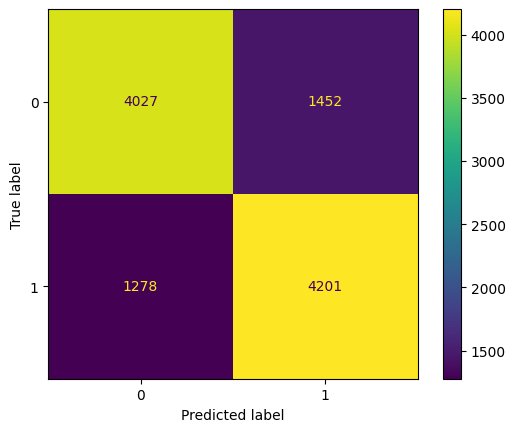

In [280]:
from sklearn.metrics import ConfusionMatrixDisplay

ConfusionMatrixDisplay.from_estimator(clf, X_val_down_prep, y_val_down_prep, values_format='d')

In [281]:
from sklearn.metrics import precision_score

print("Precisión:", precision_score(y_val_down_prep, y_pred, pos_label=1))

Precisión: 0.7431452326198479


In [282]:
from sklearn.metrics import recall_score

print("Recall:", recall_score(y_val_down_prep, y_pred, pos_label=1))

Recall: 0.7667457565249133


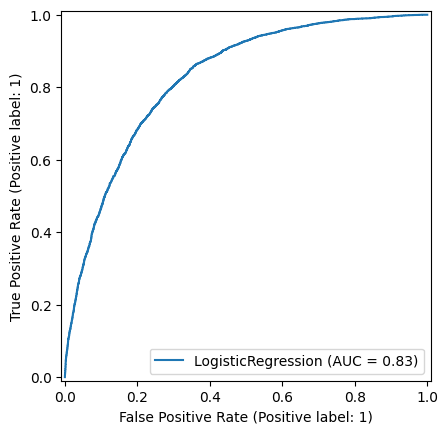

In [283]:
from sklearn.metrics import RocCurveDisplay

RocCurveDisplay.from_estimator(clf, X_val_down_prep, y_val_down_prep)

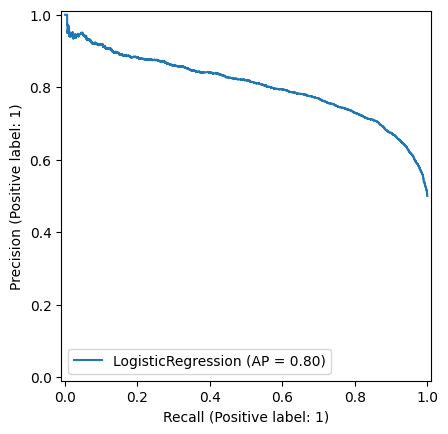

In [284]:
from sklearn.metrics import PrecisionRecallDisplay

PrecisionRecallDisplay.from_estimator(clf, X_val_down_prep, y_val_down_prep)

In [285]:
from sklearn.metrics import f1_score

print("F1 score:", f1_score(y_val_down_prep, y_pred, pos_label=1))

F1 score: 0.7547610492274524


In [299]:
y_pred_randomf = clf_rnd.predict(X_val_down_prep_reduced)

In [300]:
print("F1 score:", f1_score(y_pred_randomf, y_val_down_prep, average='weighted'))

F1 score: 0.7288204100491807


### 6.3. Evaluación con el conjunto de datos de prueba